In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [3]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

In [2]:
def plotagraficos (opiniao,modelo):
  f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
  ax1.set_title(label=modelo)
  ax1.scatter(DadosTreino['x'],DadosTreino['y'],c=opiniao,cmap="rainbow")
  ax2.set_title("Original")
  ax2.scatter(DadosTreino['x'],DadosTreino['y'],c=dados['label'],cmap="rainbow")


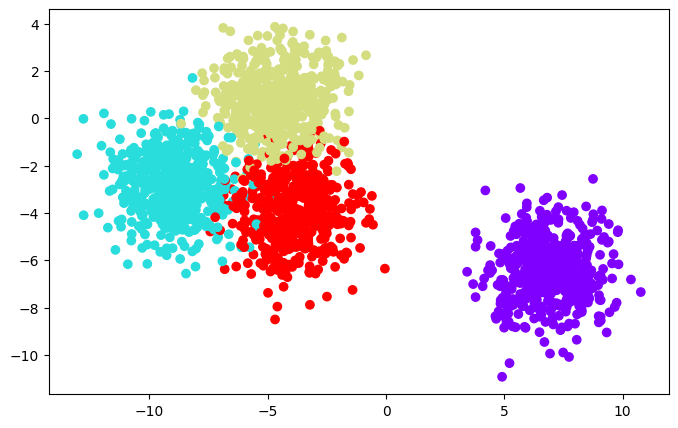

In [11]:
dados = pd.read_csv("Base11.csv")
df_dados = pd.DataFrame(dados)

plt.figure(figsize=(8,5))
plt.scatter(df_dados['x'],df_dados['y'],c=df_dados['label'],cmap="rainbow")
plt.show()
#print(df_dados)
#print(df_dados['x'])

Modelo de regressão linear múltipla

In [5]:
# Função para calcular a entropia
def calcular_entropia(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return entropy(probabilities)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


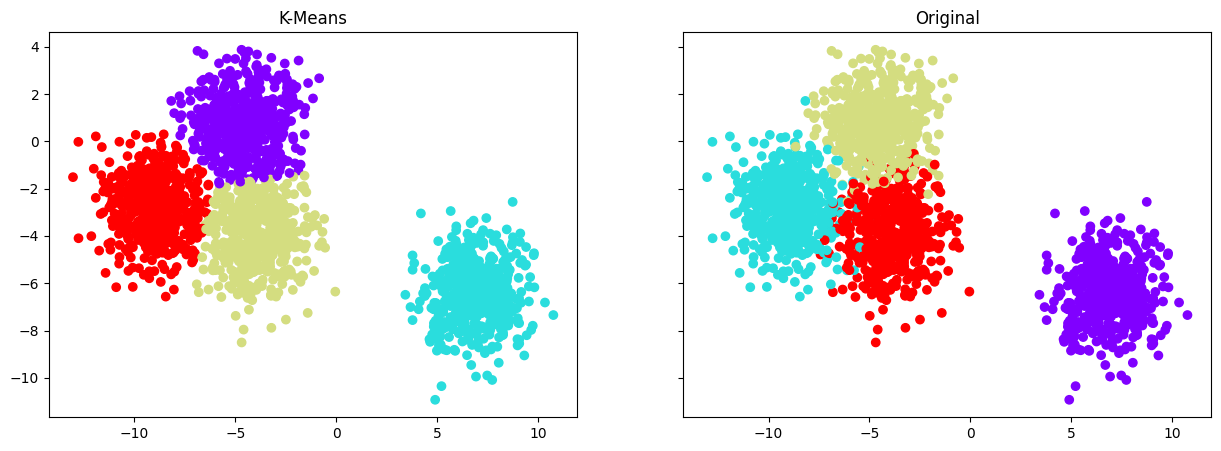

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=4, max_iter=10,random_state=0)
DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
kmeans.fit(DadosTreino)
X = kmeans.labels_
plotagraficos(X,'K-Means')


Avaliando os clusters gerados

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],kmeans.labels_))

#print("Entropia: ",calcular_entropia(kmeans.labels_))

#print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], kmeans.labels_))




Soma dos quadrados das distâncias até o centróide mais próximo:  6556.801546152159

Coesão:  20.24351986771347

Coeficiente de Silhueta:  0.5897308151519699

Rand Score K-means:  0.9704847423711855

Homogeneidade :  0.894622866135517

Completude :  0.894663421165478


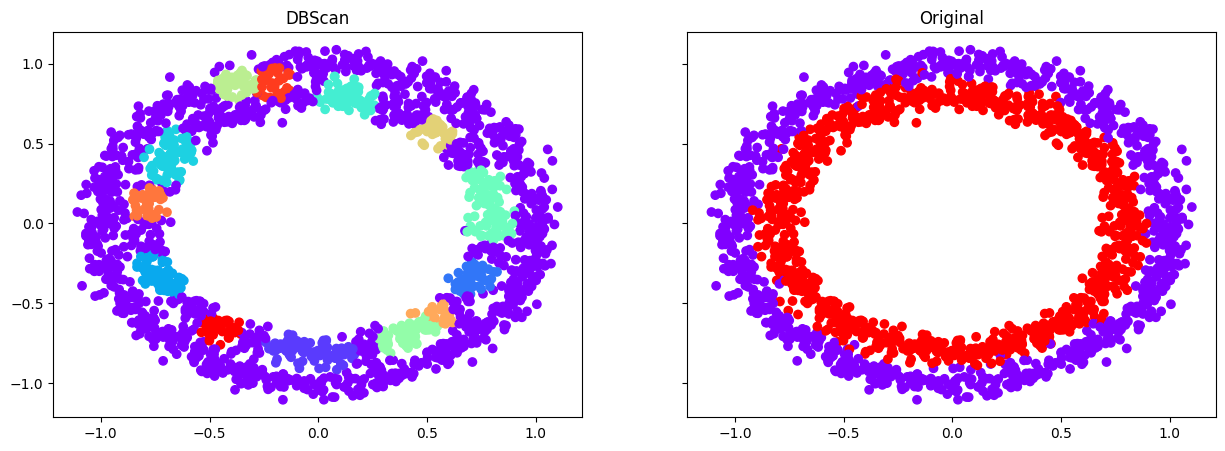

In [ ]:
from sklearn.cluster import DBSCAN

DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
db = DBSCAN(eps=0.1, min_samples=38)
db.fit(DadosTreino)
X = db.labels_
plotagraficos(X,'DBScan')

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",db.inertia_)

print("\nCoesão: ",math.sqrt(db.inertia_)/db.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],db.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],db.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],db.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], db.labels_))


Rand Score K-means:  0.8903636818409204

Homogeneidade :  0.7891232552119606

Completude :  0.6802014370932807

Matriz de contingência kmeans
 [[117 377   1   0   5]
 [ 92   3   0   0 405]
 [ 67   0   0 433   0]
 [115   0 385   0   0]]


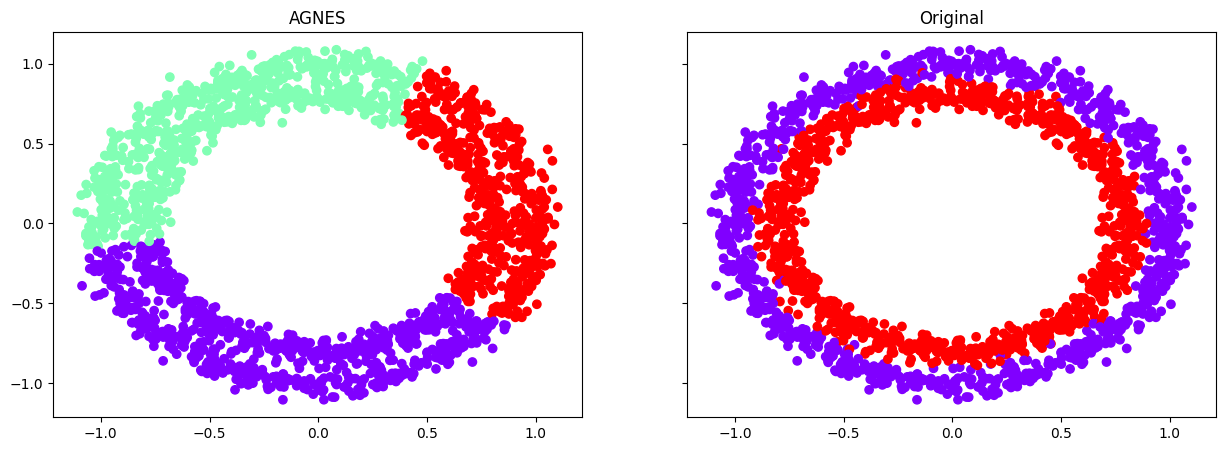

In [ ]:
from sklearn.cluster import AgglomerativeClustering

DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
Agnes = AgglomerativeClustering(n_clusters=3,linkage='ward')
Agnes.fit(DadosTreino)
X = Agnes.labels_
plotagraficos(X,'AGNES')

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

#print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",Agnes.inertia_)

#print("\nCoesão: ",math.sqrt(Agnes.inertia_)/Agnes.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,Agnes.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],Agnes.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],Agnes.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],Agnes.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], Agnes.labels_))


Coeficiente de Silhueta:  0.2968642151165107

Rand Score K-means:  0.8012516258129064

Homogeneidade :  0.9500059677054605

Completude :  0.4472471947261143

Matriz de contingência kmeans
 [[  0   0 111   1   0   0   7   3  56  90   0   0   0   0   1  95   0   8
  128   0]
 [  0 144  12   1 138   0 106  98   0   0   0   0   0   0   0   1   0   0
    0   0]
 [163   0   0   0   0   4   0   0   0   0  93  80   0  89   0   0   0   0
    0  71]
 [  0   0   0 111   0  86   0   0   1   0   0   0  85   0  87   0 113  17
    0   0]]
